# Looking at an arbitrary station without destroying results for CLF or SBA

Notes.
NGK shows a strange regime change in 2001 or so, from very high difference between methods to very low. Also a very clear seasonal dependence here. Very clear.

ESK shows similar regime change in 1999 or so. Seems to increase in recent years somewhat, which is interesting- maybe the start of what happened at CLF?

In [1]:
from viresclient import SwarmRequest
import hapiclient
from hapiclient.util import pythonshell
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from chaosmagpy import load_CHAOS_matfile
from chaosmagpy.model_utils import synth_values
from chaosmagpy.data_utils import mjd2000 # Modified Julian date
from math import sqrt
import tqdm

import utils

AttributeError: module 'numpy' has no attribute 'typeDict'

In [2]:
###Define station and time parameters, and OMNI parameters.

### Time parameters
start_date= 1998
end_date=2020

### Observatory parameters
observatory='CLF' 

### Download observatory metadata:
obsmeta = utils.fetch_ground_obs(observatory,'1998-01-01','1998-01-03')
latitude = obsmeta.attrs['Latitude_GEO']
longitude_deg = obsmeta.attrs['Longitude_GEO']
radius = obsmeta.attrs['Radius_GEO']


###OPTIONAL: input radius, latitude,longitude manually
#latitude=55.31
#longitude_deg=356.79 ##longitude is in degrees from Prime Meridian, i.e. 1 degree west is 359 degrees
#radius= 6371


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/1] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.174MB)

# First, let us download the data and check the correct import mechanism is being used.

In [3]:
###Step 1; Get year data into correct time indexing format


start_date_str= f'{start_date}-01-01'
end_date_str=f'{end_date}-01-01'

year_range=pd.date_range(start_date_str, end_date_str, freq='1YS')

print('list of years to be downloaded:')
print(year_range)

list of years to be downloaded:
DatetimeIndex(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
               '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')


In [4]:
###Step 2; Download magnetic field model for given station.


CHAOS7 = utils.loadChaosModel(start_date,end_date,latitude,longitude_deg)
CHAOS7

###NOTE: This function assumes constant radius, which is not the case; radius varies according to latitude and height
###from sea level. Change radius= parameter (last parameter in function) to get more accurate.

###Further NOTE: this function does not include the last 24 hours of the period in question. Consider
###changing this if possible.

,B_radius,B_phi,B_theta,B_H
1998-01-01 00:00:00,-42287.889183,-764.041832,-20853.233967,20867.226140
1998-01-01 00:01:00,-42287.889238,-764.041734,-20853.233988,20867.226158
1998-01-01 00:02:00,-42287.889292,-764.041637,-20853.234009,20867.226176
1998-01-01 00:03:00,-42287.889347,-764.041539,-20853.234030,20867.226193
1998-01-01 00:04:00,-42287.889401,-764.041441,-20853.234051,20867.226211
...,...,...,...,...
2020-12-30 23:56:00,-42936.953881,440.808423,-21159.899141,21164.490160
2020-12-30 23:57:00,-42936.953881,440.808423,-21159.899141,21164.490160
2020-12-30 23:58:00,-42936.953881,440.808423,-21159.899141,21164.490160
2020-12-30 23:59:00,-42936.953881,440.808423,-21159.899141,21164.490160


In [5]:
###Step 3; loop over years and download observatory data
    
    
##Define start and end of download period for this year
start= start_date_str
end= end_date_str

print('Downloading Observatory data for',observatory,str(start)[:4],'to',str(end)[:4])

obs = utils.fetch_ground_obs(observatory, start, end)#Download obs data

print(obs)

obs = utils.manipulate_obs_data(obs,CHAOS7,option=2)#Manipulate obs data to remove background mag field


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



          |  [ Elapsed: 00:00, Remaining: ?]  

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [1/3] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (246.975MB)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [2/3] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (246.975MB)

Processing:    0%|          |  [ Elapsed: 00:00, Remaining: ? ] [3/3] 

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (167.289MB)

<xarray.Dataset>
Dimensions:    (Timestamp: 11566080, NEC: 3)
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 1998-01-01 ... 2019-12-31T23:59:00
  * NEC        (NEC) <U1 'N' 'E' 'C'
Data variables:
    B_NEC      (Timestamp, NEC) float64 2.08e+04 -771.0 ... 369.6 4.31e+04
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__19980101T000000_19980101T235959_010...
    MagneticModels:  []
    AppliedFilters:  []
    Latitude_GEO:    47.82557682325504
    Longitude_GEO:   2.266
    Radius_GEO:      6366509.931710675
Manipulating obsvervatory data


<xarray.Dataset>
Dimensions:    (Timestamp: 11566080)
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 1998-01-01 ... 2019-12-31T23:59:00
Data variables:
    B_N        (Timestamp) float64 -0.2587 -0.5594 -0.8588 ... 10.48 10.48 10.58
    B_E        (Timestamp) float64 5.746 5.647 5.347 ... -72.12 -72.22 -72.42
    B_C        (Timestamp) float64 14.99 15.19 14.99 ... -33.71 -33.71 -33.71
    B_H        (Timestamp) float64 -0.07429 -0.3785 -0.6887 ... 9.016 9.112
    dBdt       (Timestamp) float64 nan -0.3042 -0.3103 ... -0.001765 0.09647
    dBdt1      (Timestamp) float64 nan 0.3168 0.4237 ... 0.1415 0.1001 0.2237
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__19980101T000000_19980101T235959_010...
    MagneticModels:  []
    AppliedFilters:  []
    Latitude_GEO:    47.82557682325504
    Longitude_GEO:   2.266
    Radius_GEO:      6366509.931710675


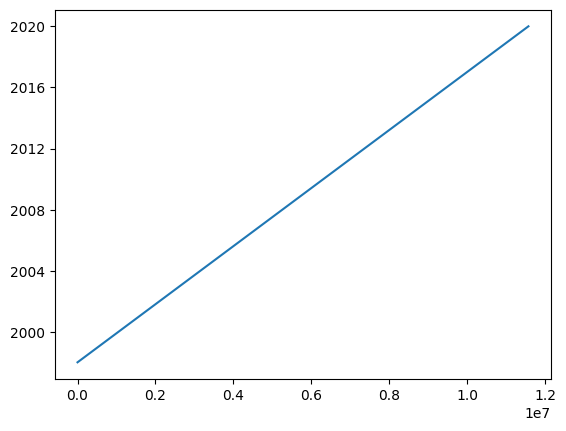

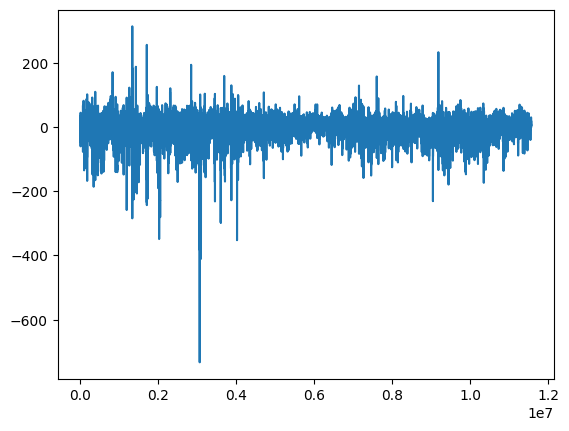

In [6]:
#print(events_tot['B_N'])

print(obs)

plt.plot(obs['Timestamp'])
plt.show()
plt.plot(obs['B_N'])
plt.show()

# Now, we look at the three time series that we are looking for: dBdt calculated both ways, and the difference between them.

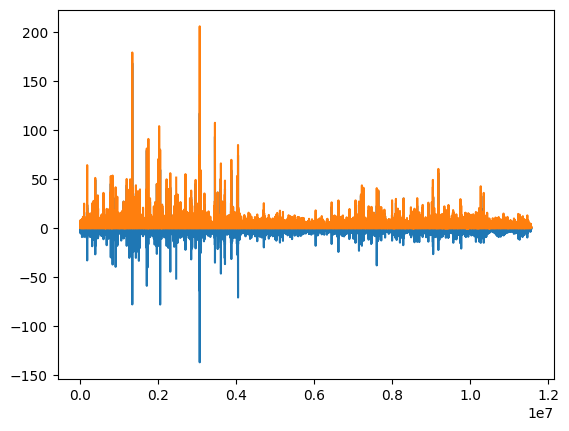

In [7]:
plt.figure()
plt.plot(obs['dBdt'])
plt.plot(obs['dBdt1'])
plt.show()

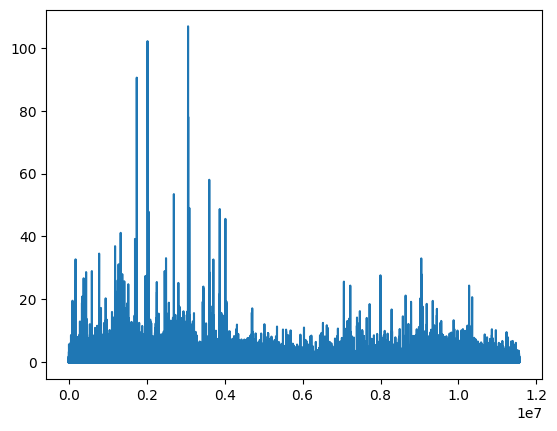

In [8]:
obs['dbdtdiff']=obs.dBdt1-((obs.dBdt)**2)**0.5
plt.plot(obs['dbdtdiff'])
plt.show()

# This next plot shows the ratio between dBdt(1) and dBdt(2).

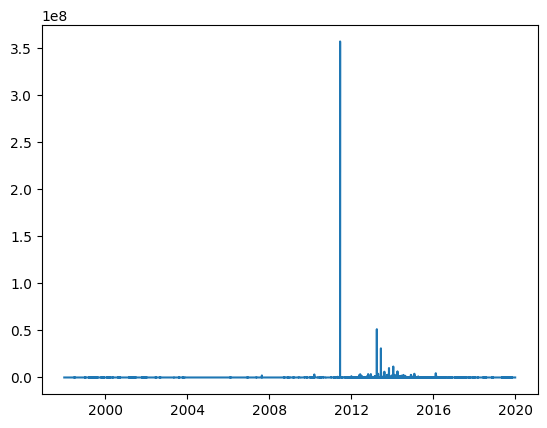

In [9]:
obs['dbdtdiff1']=((obs.dBdt1/obs.dBdt)**2)**0.5
plt.plot(obs['Timestamp'],obs['dbdtdiff1'])
plt.show()

In [10]:
max_index = obs['dbdtdiff1'].idxmax()

In [11]:
print(max_index)

<xarray.DataArray 'Timestamp' ()>
array('2011-06-17T08:45:00.000000000', dtype='datetime64[ns]')


In [12]:
filtered_obs = obs.sel(Timestamp=max_index)

# Print the values at the specific timestamp
print(filtered_obs)

<xarray.Dataset>
Dimensions:    ()
Coordinates:
    Timestamp  datetime64[ns] 2011-06-17T08:45:00
Data variables:
    B_N        float64 23.69
    B_E        float64 4.764
    B_C        float64 -5.392
    B_H        float64 23.59
    dBdt       float64 8.404e-10
    dBdt1      float64 0.2999
    dbdtdiff   float64 0.2999
    dbdtdiff1  float64 3.569e+08
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__19980101T000000_19980101T235959_010...
    MagneticModels:  []
    AppliedFilters:  []
    Latitude_GEO:    47.82557682325504
    Longitude_GEO:   2.266
    Radius_GEO:      6366509.931710675


Now plot as a log plot.

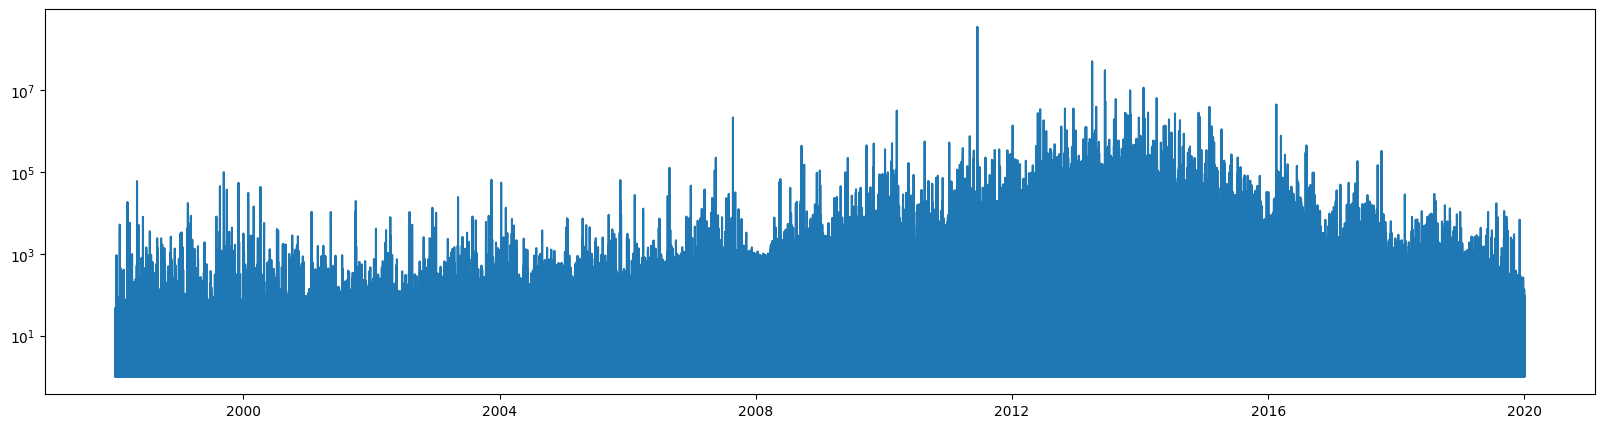

In [13]:
plt.figure(figsize=(20,5))
plt.plot(obs['Timestamp'],obs['dbdtdiff1'])
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

##This result is very interesting. It seems to suggest that dBdt exceeds 10^5 times the size regularly.
##This also lends itself to the conclusion that storm times are not the times with the highest difference between
##the two methods.

##Look below. There is a peak in the difference between the two methods in approximately 2014. Unsure what this
##could be related to. I do think that this is definitely "something".

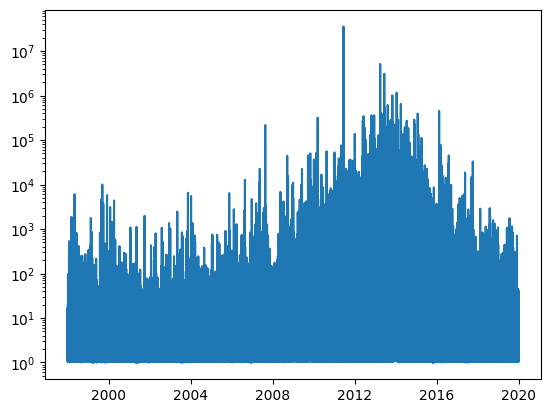

In [14]:
##Running average. 10 to 100000

rolling_avg = obs['dbdtdiff1'].rolling(Timestamp=10, min_periods=1).mean()
plt.plot(obs['Timestamp'],rolling_avg)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

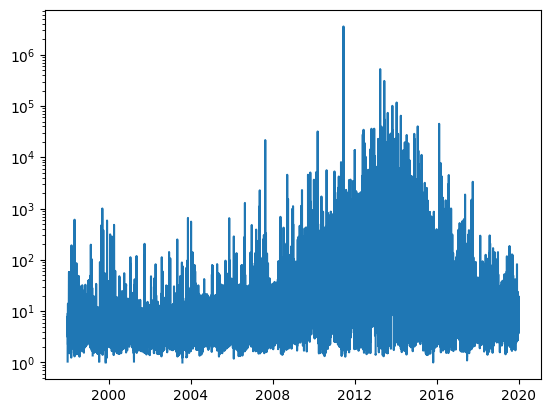

In [15]:
rolling_avg = obs['dbdtdiff1'].rolling(Timestamp=100, min_periods=1).mean()
plt.plot(obs['Timestamp'],rolling_avg)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

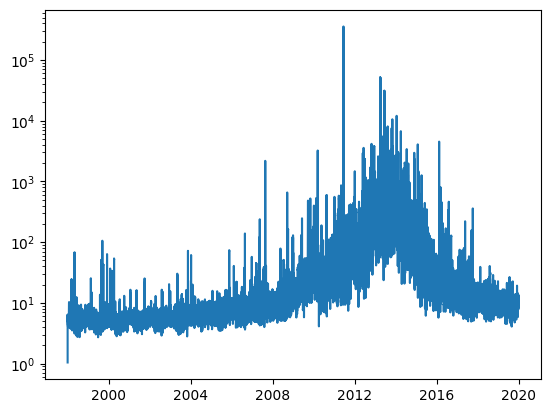

In [16]:
rolling_avg = obs['dbdtdiff1'].rolling(Timestamp=1000, min_periods=1).mean()
plt.plot(obs['Timestamp'],rolling_avg)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

In [17]:
rolling_avg = obs['dbdtdiff1'].rolling(Timestamp=10000, min_periods=1).mean()
plt.plot(obs['Timestamp'],rolling_avg)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

KeyboardInterrupt: 

# I will now look at the percentage of dBdt(calculated using the dBdt method used by Mervyn Freeman) is different between the two methods for each timestep.

In [14]:
obs['dbdtdiffpercent']=(obs['dbdtdiff']/obs['dBdt1'])

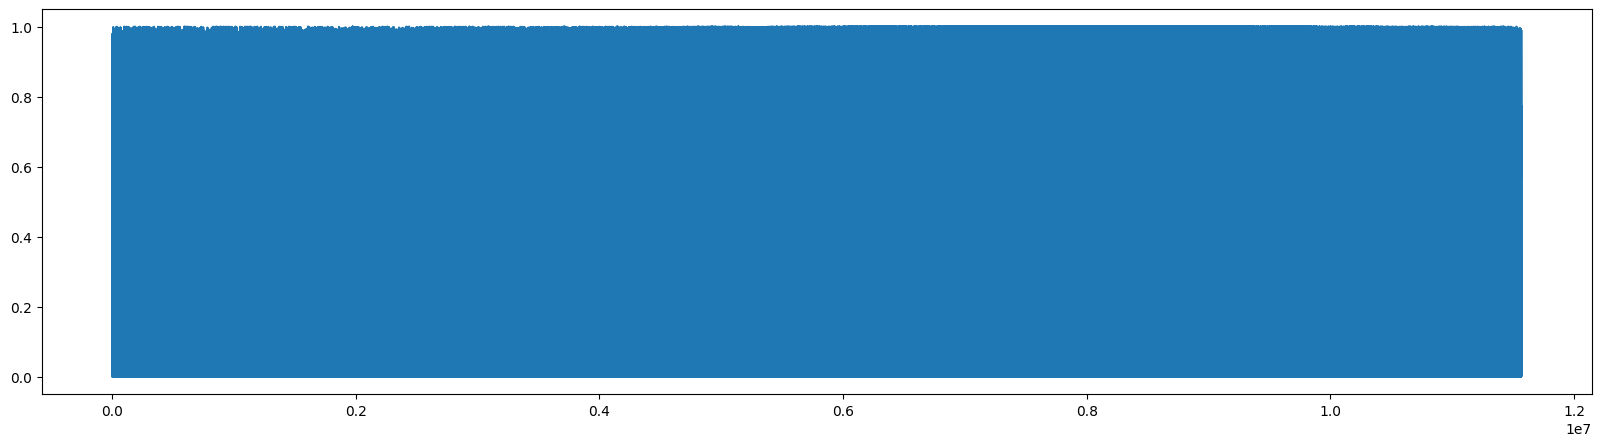

In [15]:
plt.figure(figsize=(20,5))
plt.plot(obs['dbdtdiffpercent'])

In [16]:
print(obs['dbdtdiffpercent'])

<xarray.DataArray 'dbdtdiffpercent' (Timestamp: 11566080)>
array([       nan, 0.03998051, 0.26782125, ..., 0.30585382, 0.98236932,
       0.56876683])
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 1998-01-01 ... 2019-12-31T23:59:00


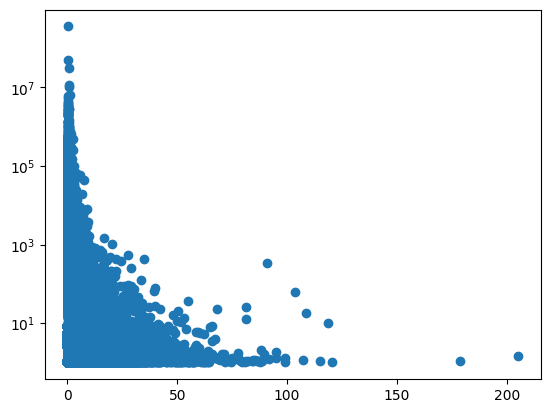

In [17]:
plt.scatter(obs['dBdt1'],obs['dbdtdiff1'])
plt.yscale('log')

# Looking at maximum values within the array. If a value is greater than 10,000; a round value would suggest some sort of error (i.e. 99999).

In [18]:
obs

<xarray.Dataset>
Dimensions:          (Timestamp: 11566080)
Coordinates:
  * Timestamp        (Timestamp) datetime64[ns] 1998-01-01 ... 2019-12-31T23:...
Data variables:
    B_N              (Timestamp) float64 -0.2587 -0.5594 -0.8588 ... 10.48 10.58
    B_E              (Timestamp) float64 5.746 5.647 5.347 ... -72.22 -72.42
    B_C              (Timestamp) float64 14.99 15.19 14.99 ... -33.71 -33.71
    B_H              (Timestamp) float64 -0.07429 -0.3785 ... 9.016 9.112
    dBdt             (Timestamp) float64 nan -0.3042 ... -0.001765 0.09647
    dBdt1            (Timestamp) float64 nan 0.3168 0.4237 ... 0.1001 0.2237
    dbdtdiff         (Timestamp) float64 nan 0.01267 0.1135 ... 0.09835 0.1272
    dbdtdiff1        (Timestamp) float64 nan 1.042 1.366 ... 1.441 56.72 2.319
    dbdtdiffpercent  (Timestamp) float64 nan 0.03998 0.2678 ... 0.9824 0.5688
Attributes:
    Sources:         ['SW_OPER_AUX_OBSM2__19980101T000000_19980101T235959_010...
    MagneticModels:  []
    AppliedFilters:  []
    Latitude_GEO:    47.82557682325504
    Longitude_GEO:   2.266
    Radius_GEO:      6366509.931710675

In [19]:
print(obs['B_N'].max())

<xarray.DataArray 'B_N' ()>
array(314.7914209)


In [20]:
print(obs['B_E'].max())

<xarray.DataArray 'B_E' ()>
array(455.73131972)


In [22]:
print(obs['B_H'].max())

<xarray.DataArray 'B_H' ()>
array(319.858665)


In [21]:
print(obs['B_C'].max())

<xarray.DataArray 'B_C' ()>
array(500.90631592)
